In [1]:
# импортируем библиотеки, которые понадобятся в этом случае

import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Populating the interactive namespace from numpy and matplotlib


In [2]:
# загрузим файлы для исследования
us_pplr_names = pd.read_csv('NationalNames.csv') 
#популярные имена в usa; стало понятно что понадобятся в ходе исследования
raw_df=pd.read_csv('players.csv')
print(raw_df.shape)

(3922, 8)


Почистим данные, посмотрим на содержимое файла с игроками, удалим null

In [5]:
raw_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
raw_df.describe()

,Unnamed: 0,height,weight,born
count,3922.000000,3921.000000,3921.000000,3921.00000
mean,1960.500000,198.704922,94.783219,1962.37975
std,1132.328206,9.269761,12.039515,20.33491
min,0.000000,160.000000,60.000000,1913.00000
25%,980.250000,190.000000,86.000000,1948.00000
50%,1960.500000,198.000000,95.000000,1964.00000
75%,2940.750000,206.000000,102.000000,1979.00000
max,3921.000000,231.000000,163.000000,1997.00000


In [7]:
raw_df.info()
raw_df = raw_df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
Unnamed: 0     3922 non-null int64
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [8]:
raw_df.drop_duplicates().head(5)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey


В этот раз решаю изучить самые популярные имена игроков в бейсбол. Используем категориальные данные Plaer, типа object. Необходимо для построениия wordcloud имен игроков.
Из имен соберем строку, тк в этом представлении передается набор слов в этот тип графика. 

In [11]:
p_name = raw_df['Player'].str.split(' ',expand= True)
p_name.head(5)

,0,1
1,Cliff,Barker
4,Ralph,Beard
6,Charlie,Black
7,Nelson,Bobb
8,Jake,Bornheimer


In [12]:
# собираем строку имен для wordcloud
word = str()
for key, value in p_name[0].items():
    word = word + str(value) + ' '
#print(word)    

In [13]:
mask = np.array(Image.open("ball.png")) #попытка сделать формой баскетбольного мяча, маска баскетбольного мяча

In [17]:
# график с маской
wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=3000,
                          height=2000,
                          mask=mask
                         ).generate(word)
# график без маски
wordcloud2 = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=3000,
                          height=2000,
                      ).generate(word)

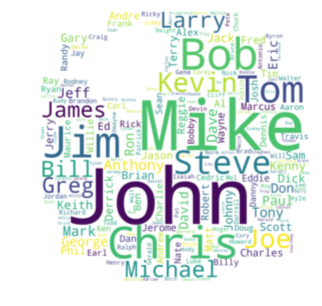

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

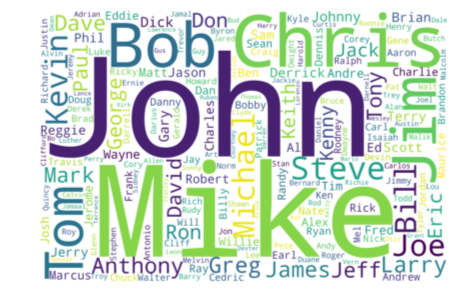

In [16]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

Этот график  говорит, что наиболее часты имена John, Mike и другие крупные в написании. Можно было сделать это другим способом, но хотелось это увидеть в виде wordcloud. Такой результат может быть потому, что эти имена могут быть одними из популярных в США. Проверим, добавив данные из файла самых популярных имен USA

In [18]:
us_pplr_names.head(3)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003


In [19]:
us_pplr_names.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


Выделим имена мальчиков для тех лет, когда собрана статистика по бейсболистам - это с 1913 по 1997 годы включительно
Из данных по годам рождения бейсболистов. И изобразим это графически стилизовав groupby

In [21]:
m_names = us_pplr_names.loc[ np.logical_and(np.logical_and(us_pplr_names['Year']>1913, us_pplr_names['Year']<1998),\
                                  us_pplr_names['Gender']!='F')]
pop_m_names = m_names.groupby('Name')[['Count']].sum().sort_values('Count', ascending=False).head(15)
    

In [22]:
pop_m_names.style.bar()

,Count
Name,
James,4611902
Robert,4498728
John,4494756
Michael,3887979
William,3446250
David,3260134
Richard,2440070
Joseph,2137091
Charles,2083977


Майк и Джон действительно среди самых популярных имен, 
однако у Джеймсов и Робертов намного меньше шансов стать популярными бейсболистами! ))